In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('Mall_Customers-2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


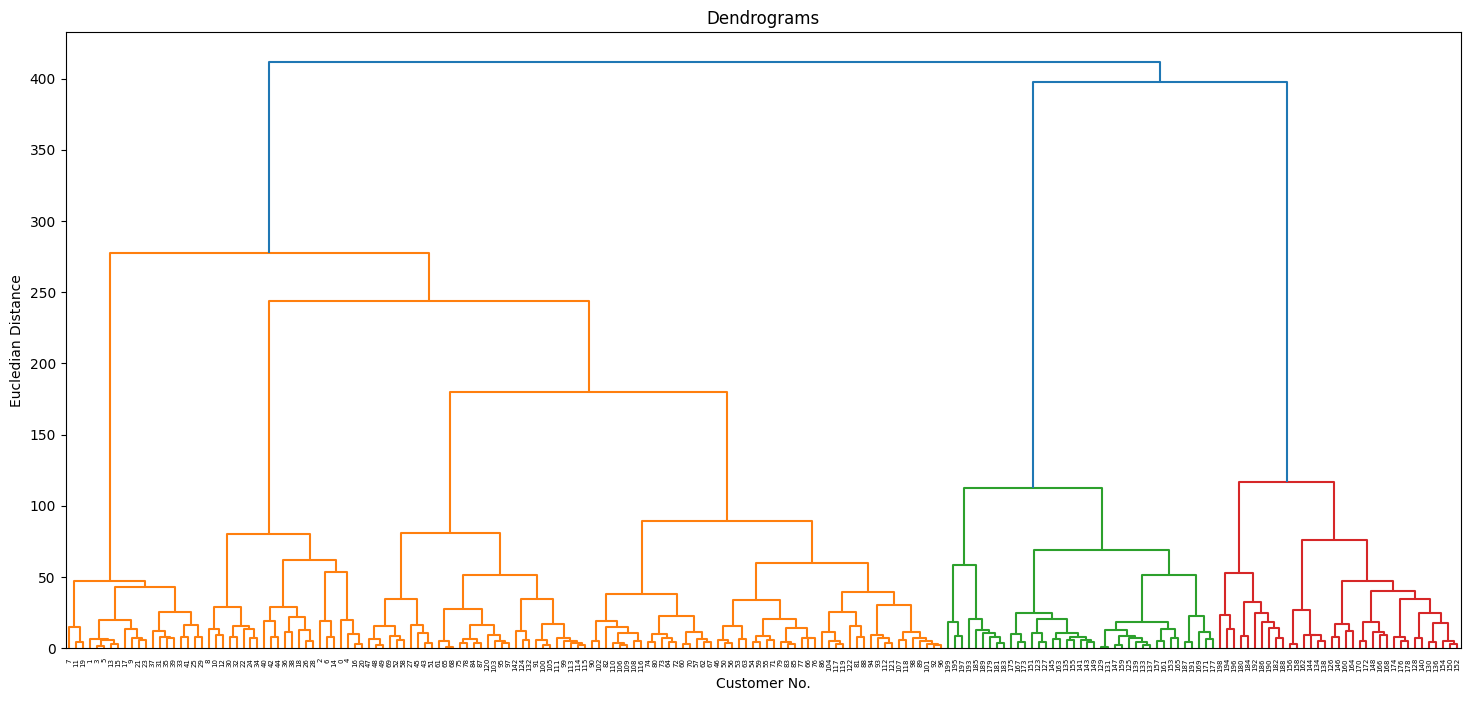

In [7]:
data.drop(['CustomerID', 'Genre'], axis = 1, inplace = True)

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import matplotlib.pyplot as plt
plt.figure(figsize = (18, 8))
dendragrams = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrograms')
plt.xlabel('Customer No.')
plt.ylabel('Eucledian Distance')
plt.xticks(rotation = 90)
plt.show()

In [8]:
from sklearn.metrics import silhouette_score
n_clust = range(2, 8)
ss_score = []
for c in n_clust:
    ag_model = AgglomerativeClustering(n_clusters = c, metric = 'euclidean', linkage = 'ward')
    label = ag_model.fit_predict(data)
    ss_score.append(silhouette_score(data, ag_model.labels_))
data_score = pd.DataFrame({'clusters': n_clust, 'score': ss_score})
data_score

,clusters,score
0,2,0.299259
1,3,0.381418
2,4,0.410380
3,5,0.440189
4,6,0.443089
5,7,0.426230


In [9]:
ag_model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

data['Cluster'] = label

cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        32.692308           86.538462               82.128205
1        53.215686           55.117647               49.470588
2        24.531250           54.187500               50.250000
3        24.850000           24.950000               81.000000
4        45.217391           26.304348               20.913043
5        41.960000           79.640000               15.400000
6        41.000000          109.700000               22.000000


In [10]:
print('Silhouette Score: ', silhouette_score(data, label))
print('Davies Score: ', davies_bouldin_score(data, label))
print('Calinski Score: ', calinski_harabasz_score(data, label))

Silhouette Score:  0.42707825494121093
Davies Score:  0.8509817233948452
Calinski Score:  153.34964620077466
